In [1]:
from ray import train, tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from ray.tune.search.hyperopt import HyperOptSearch

In [2]:
def objective(config):
    score = config['x'] ** 2 + config['y']
    for epoch in range(config['epochs']):
        score *= 1.1
        train.report({'score': score})
    # return {'score': score}

In [3]:
search_space = {
    'x': tune.grid_search([0.001, 0.01, 0.1, 1.]),
    'y': tune.choice([1,2,3]),
    'epochs': 100
}

In [5]:
tuner = tune.Tuner(objective, param_space=search_space)
results = tuner.fit()
print(results.get_best_result(metric="score", mode="min").config)

2024-03-12 12:19:41,164	INFO tune.py:1042 -- Total run time: 2.90 seconds (1.86 seconds for the tuning loop).


{'x': 1.0, 'y': 1, 'epochs': 100}


In [6]:
tuner = tune.Tuner(
    objective,
    tune_config=tune.TuneConfig(
        num_samples=20,
        scheduler=ASHAScheduler(metric='score', mode='max')
    ),
    param_space=search_space
)
results = tuner.fit()

2024-03-12 12:19:51,292	INFO tune.py:1042 -- Total run time: 7.02 seconds (5.99 seconds for the tuning loop).


In [7]:
results

ResultGrid<[
  Result(
    metrics={'score': 1337.3751511493458},
    path='C:/Users/johan/ray_results/objective_2024-03-12_12-19-44/objective_6d73c_00000_0_x=0.0010,y=3_2024-03-12_12-19-44',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'score': 2.2001100000000005},
    path='C:/Users/johan/ray_results/objective_2024-03-12_12-19-44/objective_6d73c_00001_1_x=0.0100,y=2_2024-03-12_12-19-44',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'score': 2.211},
    path='C:/Users/johan/ray_results/objective_2024-03-12_12-19-44/objective_6d73c_00002_2_x=0.1000,y=2_2024-03-12_12-19-44',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'score': 2.2},
    path='C:/Users/johan/ray_results/objective_2024-03-12_12-19-44/objective_6d73c_00003_3_x=1.0000,y=1_2024-03-12_12-19-44',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'score': 1.1000011},
    path='C:/Users/johan/ray_results/objective_2024-03-12_1

In [8]:
len(results)

80

In [9]:
dfs = {result.path: result.metrics_dataframe for result in results}

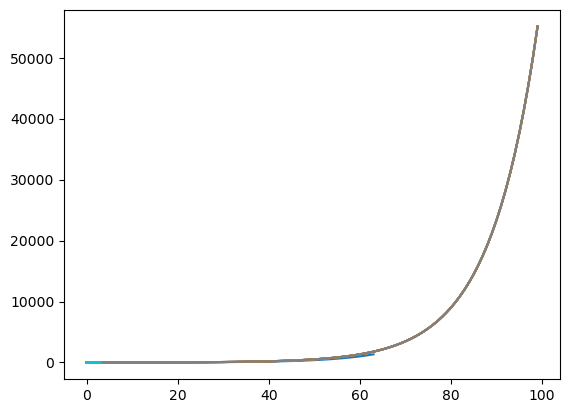

In [10]:
# Plot by epoch
ax = None  # This plots everything on the same plot
for d in dfs.values():
    ax = d.score.plot(ax=ax, legend=False)

In [1]:
from ray import train, tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from ray.tune.search.hyperopt import HyperOptSearch
from hyperopt import hp

In [22]:
def objective(config):
    score = config['x'] ** 2 + config['y']
    for epoch in range(config['epochs']):
        score *= 1.1
        train.report({'score': score})
    # return {'score': score}

In [3]:
search_space = {
    "x": hp.choice("x", [0.001, 0.01, 0.1, 1.]),
    "y": hp.choice("y", [1,2,3]),
}

In [28]:
search_space = {
    'x': tune.choice([0.001, 0.01, 0.1, 1.]),
    'y': tune.choice([1,2,3]),
    'epochs': 5000
}

In [38]:
tuner = tune.Tuner(
    trainable=objective,
    param_space=search_space,
    tune_config=tune.TuneConfig(
        metric='score',
        mode='max',
        search_alg=HyperOptSearch(
            # space=search_space,
            metric='score',
            mode='max'
        ),
        scheduler=ASHAScheduler(
            #metric="score",
            #mode="max",
            max_t=1000,
            grace_period=5,
            reduction_factor=3,
            brackets = 1
        ),
        num_samples=20,
        max_concurrent_trials=3,
    ),
    run_config=train.RunConfig(
        progress_reporter=CLIReporter(
            metric_columns=["score"]
        )
    )
)
results = tuner.fit()

2024-03-12 14:56:29,212	INFO tune.py:583 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


== Status ==
Current time: 2024-03-12 14:56:29 (running for 00:00:00.11)
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 405.000: None | Iter 135.000: None | Iter 45.000: None | Iter 15.000: None | Iter 5.000: None
Logical resource usage: 1.0/20 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:G)
Result logdir: C:/Users/johan/ray_results/objective_2024-03-12_14-56-29
Number of trials: 1/20 (1 PENDING)


== Status ==
Current time: 2024-03-12 14:56:34 (running for 00:00:05.11)
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 405.000: 1.7482518024672534e+17 | Iter 135.000: 1165679.0519026185 | Iter 45.000: 219.40035589216106 | Iter 15.000: 12.573516989941124 | Iter 5.000: 4.305483750333336
Logical resource usage: 3.0/20 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:G)
Current best trial: 930bb62e with score=9.87973167202411e+41 and parameters={'x': 1.0, 'y': 3, 'epochs': 5000}
Result logdir: C:/Users/johan/ray_results/objective_2024-03-12_14-56-29
Number of trials: 6/20 (1 PENDING, 1 RUNNING, 4 TER

2024-03-12 14:56:39,328	INFO tune.py:1042 -- Total run time: 10.12 seconds (8.49 seconds for the tuning loop).


In [39]:
results.get_dataframe()

,score,timestamp,checkpoint_dir_name,done,training_iteration,trial_id,date,time_this_iter_s,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/x,config/y,config/epochs,logdir
0,2.470180e+41,1710251791,None,True,1000,eeb350d8,2024-03-12_14-56-31,0.000000,0.060789,38236,AT-MB-PC-E13,127.0.0.1,0.060789,1000,0.010,1,5000,eeb350d8
1,4.939866e+41,1710251792,None,True,1000,b569125c,2024-03-12_14-56-32,0.000000,0.070720,38236,AT-MB-PC-E13,127.0.0.1,0.070720,1000,1.000,1,5000,b569125c
2,9.879732e+41,1710251793,None,True,1000,930bb62e,2024-03-12_14-56-33,0.000000,0.060118,38236,AT-MB-PC-E13,127.0.0.1,0.060118,1000,1.000,3,5000,930bb62e
3,3.221181e+00,1710251793,None,True,5,eb0bac2d,2024-03-12_14-56-33,0.000000,0.000000,38236,AT-MB-PC-E13,127.0.0.1,0.000000,5,0.010,2,5000,eb0bac2d
4,7.434498e+41,1710251794,None,True,1000,096d3267,2024-03-12_14-56-34,0.000000,0.063516,38236,AT-MB-PC-E13,127.0.0.1,0.063516,1000,0.100,3,5000,096d3267
5,7.434498e+41,1710251795,None,True,1000,b277597a,2024-03-12_14-56-35,0.000000,0.057053,38236,AT-MB-PC-E13,127.0.0.1,0.057053,1000,0.100,3,5000,b277597a
6,4.831532e+00,1710251796,None,True,5,e0035571,2024-03-12_14-56-36,0.000000,0.000000,38236,AT-MB-PC-E13,127.0.0.1,0.000000,5,0.001,3,5000,e0035571
7,3.221022e+00,1710251796,None,True,5,693f2328,2024-03-12_14-56-36,0.000000,0.000000,38236,AT-MB-PC-E13,127.0.0.1,0.000000,5,0.001,2,5000,693f2328
8,3.221181e+00,1710251796,None,True,5,389de415,2024-03-12_14-56-36,0.000000,0.000999,38236,AT-MB-PC-E13,127.0.0.1,0.000999,5,0.010,2,5000,389de415
9,1.610671e+00,1710251796,None,True,5,9ee1565c,2024-03-12_14-56-36,0.000000,0.000000,38236,AT-MB-PC-E13,127.0.0.1,0.000000,5,0.010,1,5000,9ee1565c


In [40]:
dfs = {result.path: result.metrics_dataframe for result in results}

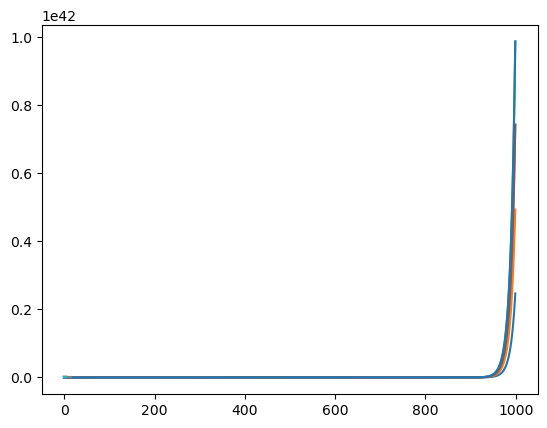

In [41]:
# Plot by epoch
ax = None  # This plots everything on the same plot
for d in dfs.values():
    ax = d.score.plot(ax=ax, legend=False)